In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

You should consider upgrading via the 'C:\Users\mpete\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the 'C:\Users\mpete\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [6]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [8]:
# Set features. This will also be used as your x values.
selected_features = df
X = selected_features
X.head()
print(X.shape)

(6991, 41)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
y = df["koi_disposition"]

print(y.shape)

(6991,)


In [12]:
# import dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=115, stratify=y)

In [13]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2700,0,0,0,0,31.804760,0.000091,-0.000091,190.25413,0.00224,-0.00224,...,-128,4.235,0.143,-0.117,1.356,0.212,-0.259,287.62082,43.141647,13.178
21,0,0,0,0,4.280964,0.000006,-0.000006,171.89659,0.00115,-0.00115,...,-169,4.564,0.032,-0.168,0.831,0.207,-0.069,294.26581,49.314091,15.356
5040,0,1,1,0,0.829019,0.000002,-0.000002,131.46667,0.00401,-0.00401,...,-255,4.271,0.124,-0.186,1.328,0.408,-0.220,296.03485,45.490822,14.661
2795,0,0,1,0,1.387838,0.000006,-0.000006,132.11351,0.00318,-0.00318,...,-219,4.442,0.054,-0.216,1.044,0.335,-0.112,295.64212,48.773071,15.167
1765,0,0,0,0,14.383227,0.000086,-0.000086,140.57648,0.00530,-0.00530,...,-135,4.249,0.137,-0.112,1.291,0.216,-0.216,290.08276,50.863480,13.312


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model - KNN



k: 1, Train/Test Score: 1.000/0.794
k: 3, Train/Test Score: 0.900/0.808
k: 5, Train/Test Score: 0.877/0.813
k: 7, Train/Test Score: 0.872/0.818
k: 9, Train/Test Score: 0.863/0.818
k: 11, Train/Test Score: 0.854/0.819
k: 13, Train/Test Score: 0.848/0.812
k: 15, Train/Test Score: 0.847/0.812
k: 17, Train/Test Score: 0.844/0.810
k: 19, Train/Test Score: 0.843/0.812
k: 21, Train/Test Score: 0.842/0.810
k: 23, Train/Test Score: 0.842/0.809
k: 25, Train/Test Score: 0.838/0.814
k: 27, Train/Test Score: 0.836/0.810
k: 29, Train/Test Score: 0.837/0.812
k: 31, Train/Test Score: 0.835/0.812
k: 33, Train/Test Score: 0.834/0.811
k: 35, Train/Test Score: 0.835/0.808
k: 37, Train/Test Score: 0.833/0.806
k: 39, Train/Test Score: 0.833/0.811
k: 41, Train/Test Score: 0.831/0.807
k: 43, Train/Test Score: 0.829/0.805
k: 45, Train/Test Score: 0.828/0.808
k: 47, Train/Test Score: 0.827/0.812
k: 49, Train/Test Score: 0.827/0.808
k: 51, Train/Test Score: 0.827/0.807
k: 53, Train/Test Score: 0.824/0.811
k: 55,

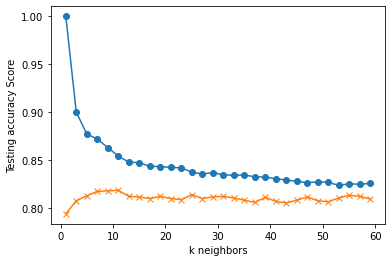

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.812


In [25]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")


Training Data Score: 0.8371161548731643
Testing Data Score: 0.8117848970251716


In [26]:
knn.predict(X_test_scaled)[:10]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE',
       'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [27]:
knn.predict_proba(X_test)[:10]

array([[0.03448276, 0.        , 0.96551724],
       [0.06896552, 0.03448276, 0.89655172],
       [0.06896552, 0.06896552, 0.86206897],
       [0.06896552, 0.03448276, 0.89655172],
       [0.06896552, 0.06896552, 0.86206897],
       [0.03448276, 0.03448276, 0.93103448],
       [0.        , 0.        , 1.        ],
       [0.06896552, 0.06896552, 0.86206897],
       [0.06896552, 0.06896552, 0.86206897],
       [0.03448276, 0.06896552, 0.89655172]])

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = 

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)